In [3]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visuals
plt.style.use('seaborn-v0_8-whitegrid')

sns.set_palette("viridis")

 
# Update the file path to match your local setup
df = pd.read_csv(r"C:\Users\padma\SampleSuperstore.csv", encoding ='latin1')

# Preview dataset
df.head()

 
# Basic info
df.info()



 
 





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
# Summary statistics
df.describe(include='all')

# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()

 
# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Optional: Handle missing data (if any)
df.dropna(inplace=True)

# Confirm cleanup
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
 
# Extract year and month for trend analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

# Verify new columns
df[['Order Date', 'Year', 'Month']].head()


,Order Date,Year,Month
0,2016-11-08,2016,November
1,2016-11-08,2016,November
2,2016-06-12,2016,June
3,2015-10-11,2015,October
4,2015-10-11,2015,October


In [6]:
 

# --- Top-selling products ---
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_products)

# --- Profit by region ---
profit_by_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
print(profit_by_region)

# --- Sales trend over time ---
df['Month_Year'] = df['Order Date'].dt.to_period('M')
sales_trend = df.groupby('Month_Year')['Sales'].sum()


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64
Region
West       108418.4489
East        91522.7800
South       4674

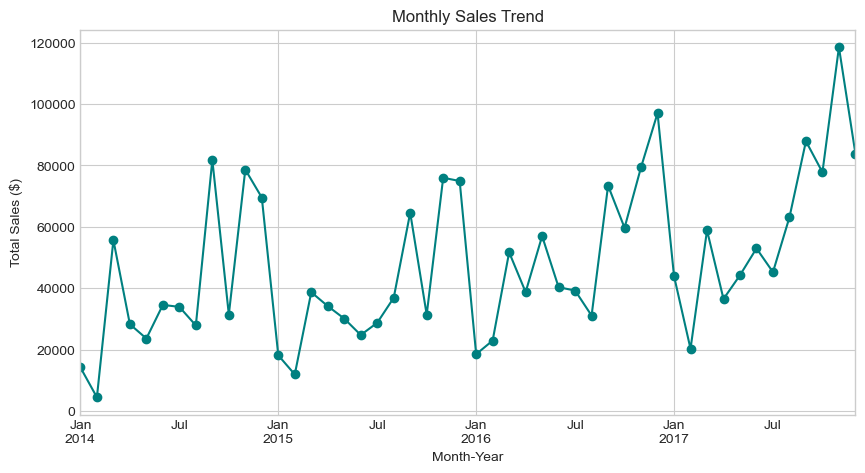

In [7]:
# --- 7.1: Monthly Sales Trend ---
plt.figure(figsize=(10,5))
sales_trend.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Total Sales ($)")
plt.show()

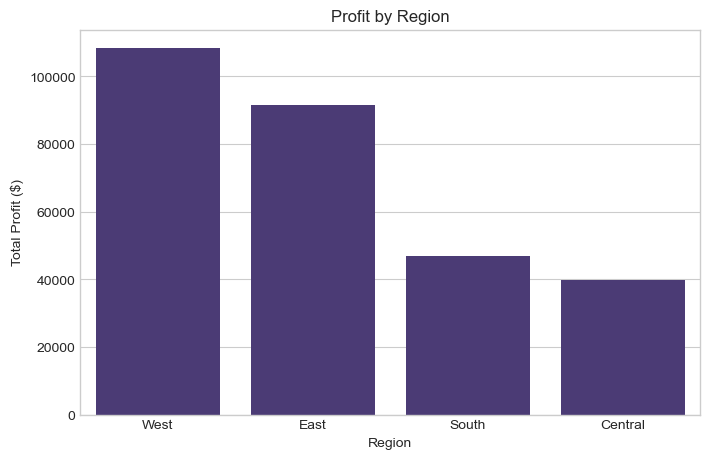

In [8]:
# --- 7.2: Profit by Region ---
plt.figure(figsize=(8,5))
sns.barplot(x=profit_by_region.index, y=profit_by_region.values)
plt.title("Profit by Region")
plt.ylabel("Total Profit ($)")
plt.show()

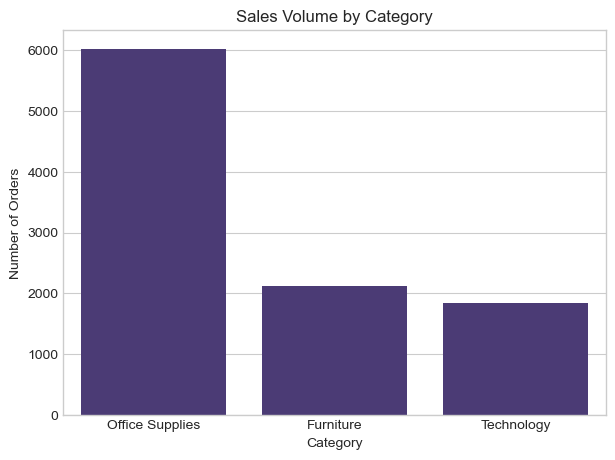

In [9]:
# --- 7.3: Sales by Category ---
plt.figure(figsize=(7,5))
sns.barplot(x=df['Category'].value_counts().index, y=df['Category'].value_counts().values)
plt.title("Sales Volume by Category")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.show()

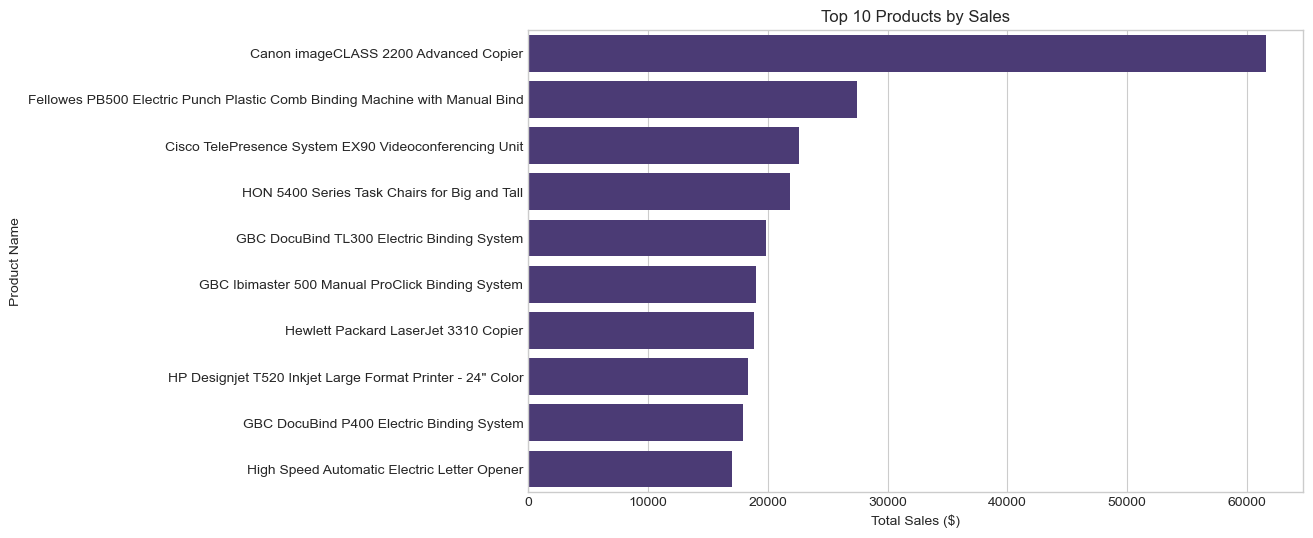

In [10]:
# --- 7.4: Top 10 Products by Sales ---
plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.show()

In [16]:
# ==========================
#   INSIGHTS
# ==========================

print("Top-performing Product:", top_products.index[0])
print("Most Profitable Region:", profit_by_region.index[0])

# Profit Margin by Category
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
category_margin = df.groupby('Category')['Profit Margin'].mean().sort_values(ascending=False)
print("\nAverage Profit Margin by Category:\n", category_margin)


Top-performing Product: Canon imageCLASS 2200 Advanced Copier
Most Profitable Region: West

Average Profit Margin by Category:
 Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin, dtype: float64


In [15]:
# ==========================
# EXPORT CLEAN DATA 
# ==========================
# Save cleaned dataset for Tableau / Power BI dashboard
df.to_csv("Cleaned_Superstore_Sales.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
